In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("../data/base_dades_neta.csv")

In [5]:
data.shape

(7907, 10)

In [6]:
data.head()

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3,1,True,False,60,flat,Horta- Guinardo,12.500000
1,1,770,2,1,True,False,59,flat,Sant Andreu,13.050847
2,2,1300,1,1,True,True,30,flat,Gràcia,43.333333
3,3,2800,1,1,True,True,70,flat,Ciutat Vella,40.000000
4,4,720,2,1,True,False,44,flat,Sant Andreu,16.363636


In [7]:
data.isnull().sum()
(data.isnull().sum() / len(data)) * 100

Unnamed: 0             0.0
price                  0.0
rooms                  0.0
bathroom               0.0
lift                   0.0
terrace                0.0
square_meters          0.0
real_state             0.0
neighborhood           0.0
square_meters_price    0.0
dtype: float64

In [8]:
data.describe().round(2)

,Unnamed: 0,price,rooms,bathroom,square_meters,square_meters_price
count,7907.00,7907.00,7907.00,7907.00,7907.00,7907.00
mean,4101.10,1416.83,2.44,1.50,84.08,17.58
std,2361.84,1013.36,1.12,0.72,45.78,8.80
min,0.00,320.00,0.00,1.00,10.00,5.56
25%,2052.50,875.00,2.00,1.00,56.00,12.78
50%,4097.00,1100.00,2.00,1.00,73.00,15.22
75%,6153.50,1500.00,3.00,2.00,95.00,19.29
max,8187.00,13478.00,10.00,6.00,480.00,144.50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7907 non-null   int64  
 1   price                7907 non-null   int64  
 2   rooms                7907 non-null   int64  
 3   bathroom             7907 non-null   int64  
 4   lift                 7907 non-null   bool   
 5   terrace              7907 non-null   bool   
 6   square_meters        7907 non-null   int64  
 7   real_state           7907 non-null   object 
 8   neighborhood         7907 non-null   object 
 9   square_meters_price  7907 non-null   float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 509.8+ KB


In [10]:
data.rename(columns={'real_state': 'property_type'}, inplace=True)

In [11]:
data['property_type'].unique()

array(['flat', 'attic', 'apartment', 'study'], dtype=object)

In [12]:
print(data['property_type'].unique())
print(data['property_type'].dtype)

['flat' 'attic' 'apartment' 'study']
object


In [13]:
data['property_type'].value_counts()

property_type
flat         6497
apartment     987
attic         314
study         109
Name: count, dtype: int64

In [14]:
data = data.dropna(subset=['property_type'])
data.reset_index(drop=True, inplace=True)

# Analisis de los datos

# Variables numéricas

In [15]:
# Con .describe() conocemos diversos datos de interés como la mediana, la desviación típica y los percentiles de las variables numéricas
data[['price', 'rooms', 'bathroom', 'square_meters', 'square_meters_price']].describe().round(2)

,price,rooms,bathroom,square_meters,square_meters_price
count,7907.00,7907.00,7907.00,7907.00,7907.00
mean,1416.83,2.44,1.50,84.08,17.58
std,1013.36,1.12,0.72,45.78,8.80
min,320.00,0.00,1.00,10.00,5.56
25%,875.00,2.00,1.00,56.00,12.78
50%,1100.00,2.00,1.00,73.00,15.22
75%,1500.00,3.00,2.00,95.00,19.29
max,13478.00,10.00,6.00,480.00,144.50


<Axes: >

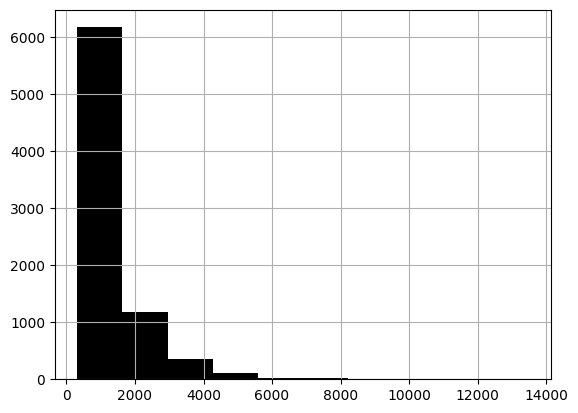

In [16]:
# Vamos a crear histogramas para visualizar mejor estos datos en cada una de las columnas
data['price'].hist(color='black')

En el grafico de arriba podemos observar que abundan las viviendas entre 0€ y 1800€, que hay unas pocas mas de 1000 entre 1800-3000€ y a partir de ahí disminuye muchísimo la cantidad de viviendas


<Axes: >

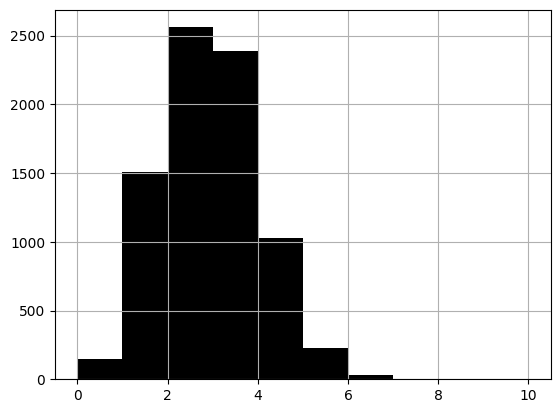

In [17]:
data['rooms'].hist(color='black')

En el gráfico de arriba podemos observar que la mayoría de viviendas tiene 2 o 3 habitaciones, veámoslo en porcentajes:

In [18]:
print(f"{(data['rooms'].value_counts(normalize=True) * 100).round(2)}")

rooms
2     32.38
3     30.24
1     19.08
4     13.03
5      2.88
0      1.91
6      0.35
7      0.06
10     0.04
9      0.03
Name: proportion, dtype: float64


<Axes: >

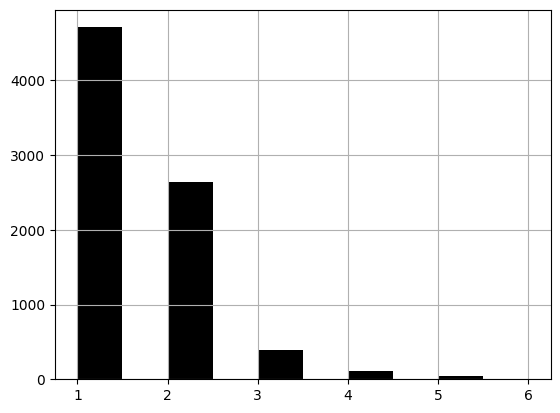

In [19]:
data['bathroom'].hist(color='black')

En el gráfico de arriba podemos observar que la gran mayoría de viviendas tiene 1 solo baño, veámoslo en porcentajes:

In [20]:
print(f"{(data['bathroom'].value_counts(normalize=True) * 100).round(2)}")

bathroom
1    59.59
2    33.46
3     4.92
4     1.44
5     0.49
6     0.09
Name: proportion, dtype: float64


<Axes: >

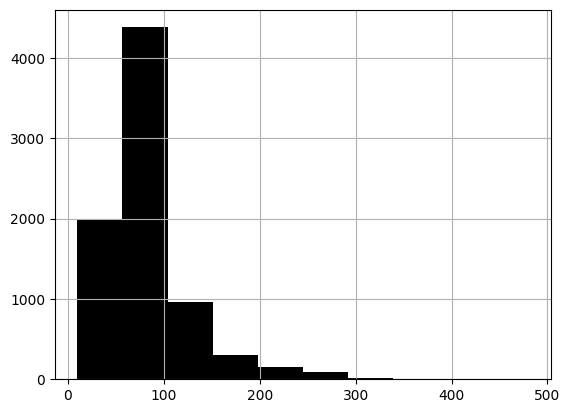

In [21]:
data['square_meters'].hist(color='black')

<Axes: >

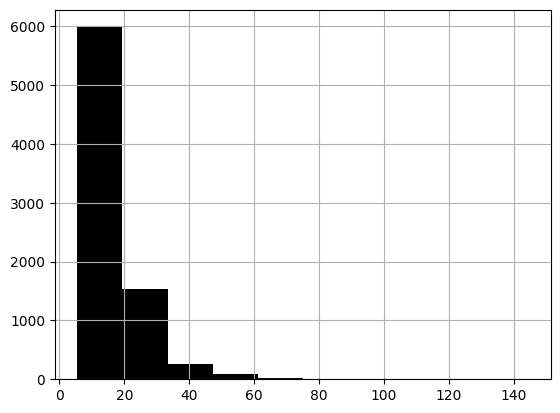

In [22]:
data['square_meters_price'].hist(color='black')

# Variables categóricas
Para las variables categóricas, nos viene bien contar cuantos valores hay en cada variable

In [23]:
data['neighborhood'].value_counts()

neighborhood
Eixample               2358
Ciutat Vella           1313
Sarria-Sant Gervasi    1312
Gràcia                  658
Sant Martí              591
Sants-Montjuïc          572
Les Corts               511
Horta- Guinardo         305
Sant Andreu             174
Nou Barris              113
Name: count, dtype: int64

In [24]:
data['property_type'].value_counts()

property_type
flat         6497
apartment     987
attic         314
study         109
Name: count, dtype: int64

<Axes: title={'center': 'Tipo de vivienda'}, xlabel='property_type'>

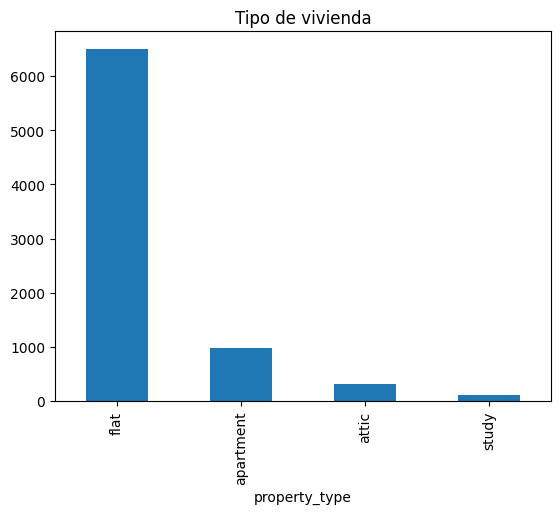

In [25]:
data['property_type'].value_counts().plot(kind='bar', title='Tipo de vivienda')

<Axes: title={'center': 'Barrio'}, xlabel='neighborhood'>

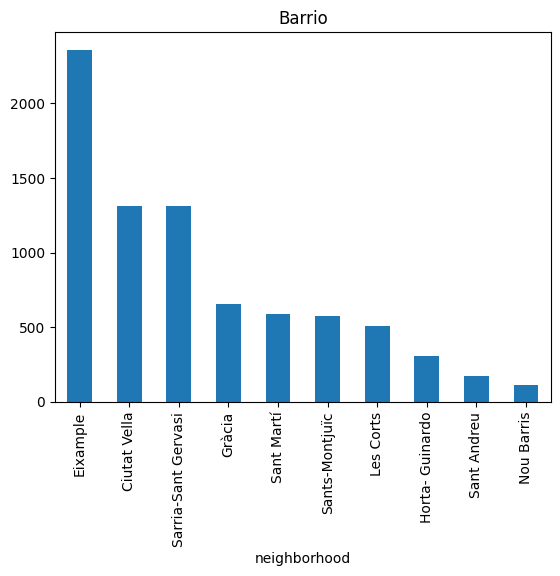

In [26]:
data['neighborhood'].value_counts().plot(kind='bar', title='Barrio')

# Porcentajes
Veamos en porcentajes la cantidad de viviendas por tipo y por barrio

In [27]:
print(f"{(data['property_type'].value_counts(normalize=True) * 100).round(2)}")

property_type
flat         82.17
apartment    12.48
attic         3.97
study         1.38
Name: proportion, dtype: float64


In [28]:
print(f"{(data['neighborhood'].value_counts(normalize=True) * 100).round(2)}")

neighborhood
Eixample               29.82
Ciutat Vella           16.61
Sarria-Sant Gervasi    16.59
Gràcia                  8.32
Sant Martí              7.47
Sants-Montjuïc          7.23
Les Corts               6.46
Horta- Guinardo         3.86
Sant Andreu             2.20
Nou Barris              1.43
Name: proportion, dtype: float64


# Variables Booleanas
Veamos cuantas viviendas tienen ascensor y cuantas viviendas tienen terraza

In [29]:
data.lift.value_counts()

lift
True     5499
False    2408
Name: count, dtype: int64

In [32]:
data.terrace.value_counts()

terrace
False    6286
True     1621
Name: count, dtype: int64

Ahora veámoslo en porcentaje

In [41]:
print(f"{(data['lift'].value_counts(normalize=True) * 100).round(2)}")

lift
True     69.57
False    30.43
Name: proportion, dtype: float64


In [34]:
print(f"{(data['terrace'].value_counts(normalize=True) * 100).round(2)}")

terrace
False    79.5
True     20.5
Name: proportion, dtype: float64


Y ahora en graficos de barras

<Axes: title={'center': 'Ascensor'}, xlabel='lift'>

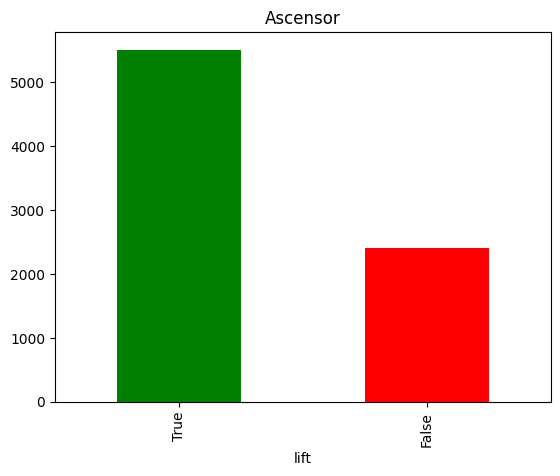

In [42]:
data['lift'].value_counts().plot(kind='bar', color=['green', 'red'], title='Ascensor')

<Axes: title={'center': 'Terraza'}, xlabel='terrace'>

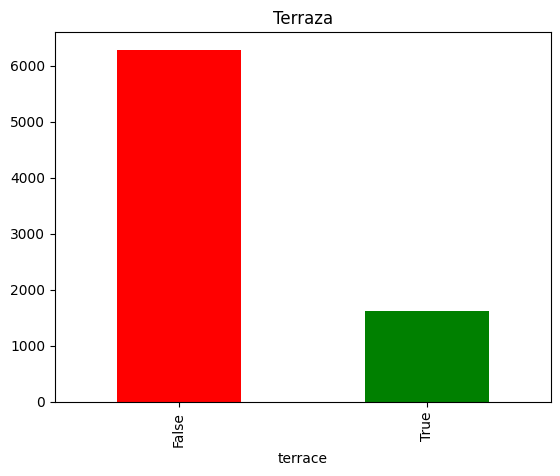

In [35]:
data['terrace'].value_counts().plot(kind='bar', color=['red', 'green'], title='Terraza')

# precios

In [46]:
data['price'].describe()
# mediana de los precios en barcelona

,price
count,7920.000000
mean,1434.894949
std,1119.528321
min,320.000000
25%,875.000000
50%,1100.000000
75%,1500.000000
max,15000.000000


In [47]:
mediana_precios_zona = data.groupby('neighborhood')['price'].median()
mediana_precios_zona
#mediana de los precios por barrio

,price
neighborhood,
Ciutat Vella,995.0
Eixample,1225.0
Gràcia,977.5
Horta- Guinardo,825.0
Les Corts,1213.5
Nou Barris,780.0
Sant Andreu,850.0
Sant Martí,1000.0
Sants-Montjuïc,900.0


# metros cuadrados

In [48]:
data['square_meters'].describe().round(2)
#mediana del tamaño de los pisos en barcelona

,square_meters
count,7920.00
mean,84.54
std,47.58
min,10.00
25%,56.00
50%,73.00
75%,95.00
max,679.00


In [49]:
mediana_metros_zona = data.groupby('neighborhood')['square_meters'].median().sort_values(ascending=False)
mediana_metros_zona
# muestra la mediana del tamaño de los pisos por barrio ordenado de mas grande a mas pequeño

,square_meters
neighborhood,
Les Corts,85.0
Sarria-Sant Gervasi,85.0
Eixample,80.0
Sant Martí,71.0
Gràcia,70.0
Sant Andreu,70.0
Horta- Guinardo,65.0
Sants-Montjuïc,65.0
Nou Barris,63.0


In [50]:
mediana_precio_tipo = data.groupby('property_type')['price'].median().sort_values(ascending=False)
mediana_precio_tipo
#precio promedio por tipo de propiedad

,price
property_type,
apartment,1700.0
attic,1300.0
flat,1050.0
study,690.0


In [51]:
frecuencia = pd.crosstab(data['neighborhood'], data['property_type'])
frecuencia
#cantidad de tipos de vivienda por barrio

property_type,apartment,attic,flat,study
neighborhood,,,,
Ciutat Vella,277,33,972,32
Eixample,380,80,1885,15
Gràcia,51,33,561,13
Horta- Guinardo,14,25,254,12
Les Corts,44,20,444,4
Nou Barris,1,6,106,0
Sant Andreu,6,7,159,2
Sant Martí,53,19,512,8
Sants-Montjuïc,49,20,495,8


# Analisis multivariable

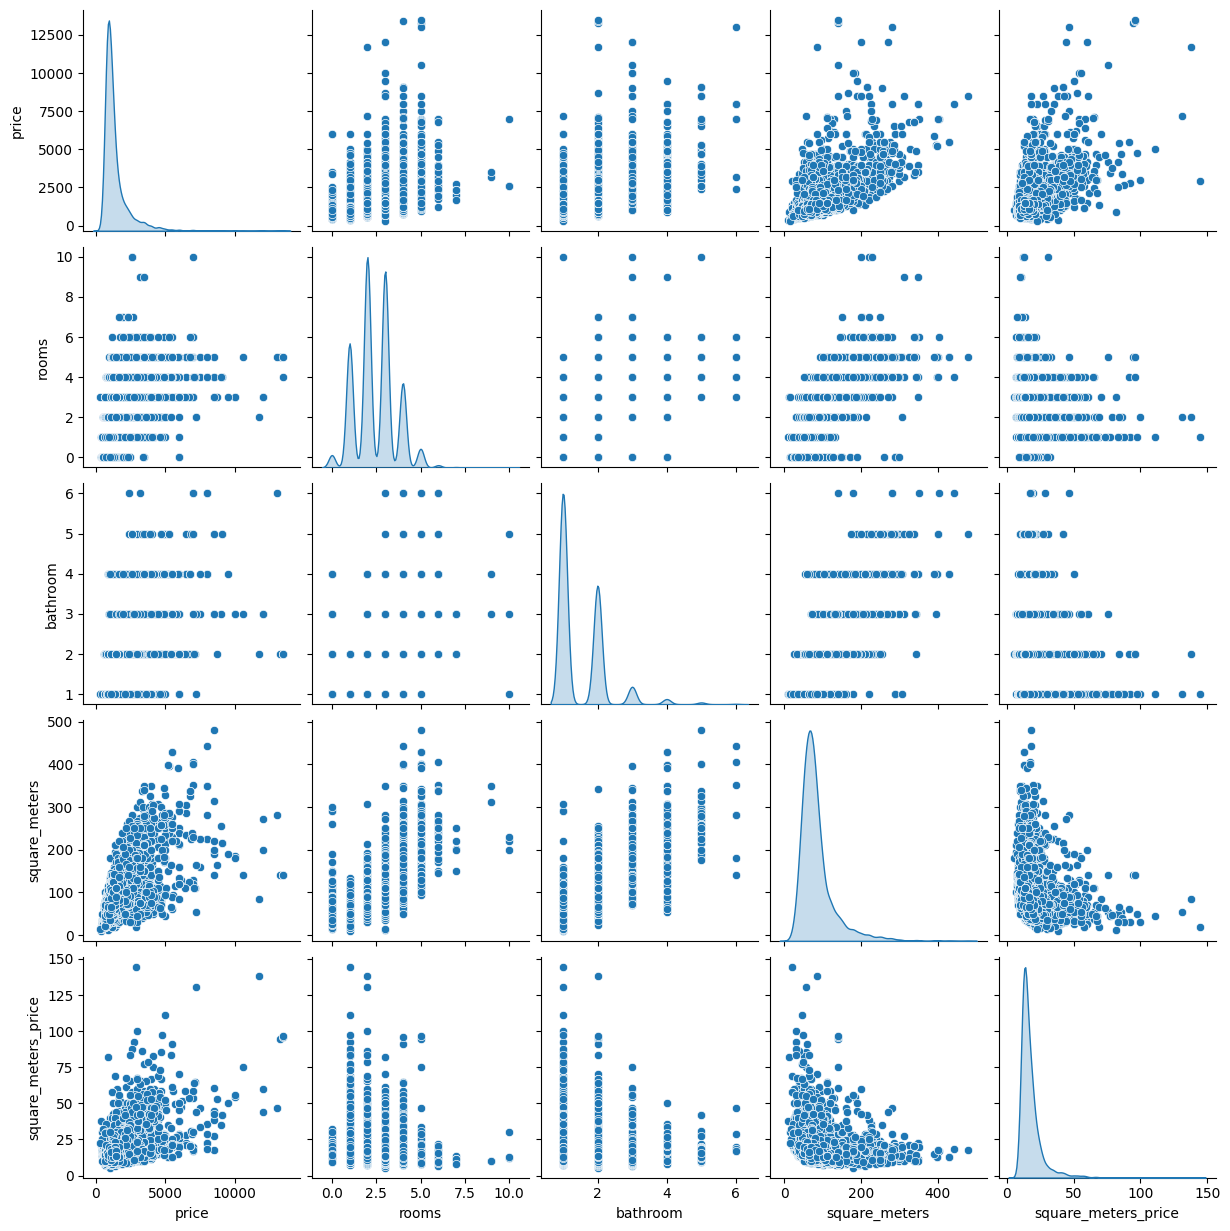

In [6]:
# Detectar relacions no lineals o patrons interessants entre variables (numériques).
sns.pairplot(data, vars=['price', 'rooms', 'bathroom', 'square_meters', 'square_meters_price'], diag_kind='kde')

In [7]:
# Preu mitjà de cada barri
data.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

neighborhood
Sarria-Sant Gervasi    1811.697409
Les Corts              1600.645793
Eixample               1579.968193
Sant Martí             1424.468697
Ciutat Vella           1200.829398
Gràcia                 1138.465046
Sants-Montjuïc         1033.370629
Horta- Guinardo         907.600000
Sant Andreu             893.563218
Nou Barris              808.433628
Name: price, dtype: float64

<Axes: xlabel='real_state', ylabel='price'>

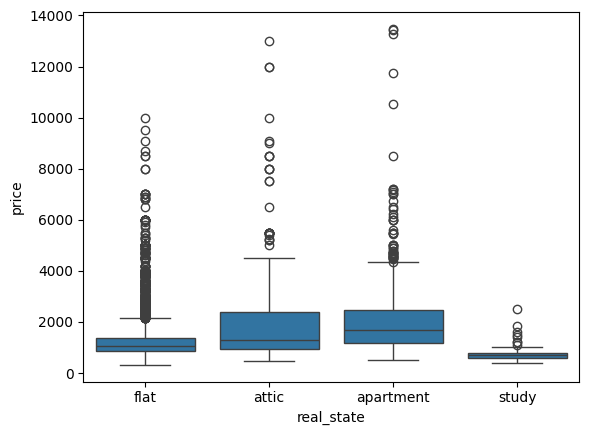

In [8]:
# Preu segons el tipus de vivenda
sns.boxplot(x='real_state', y='price', data=data)

<Axes: xlabel='rooms', ylabel='price'>

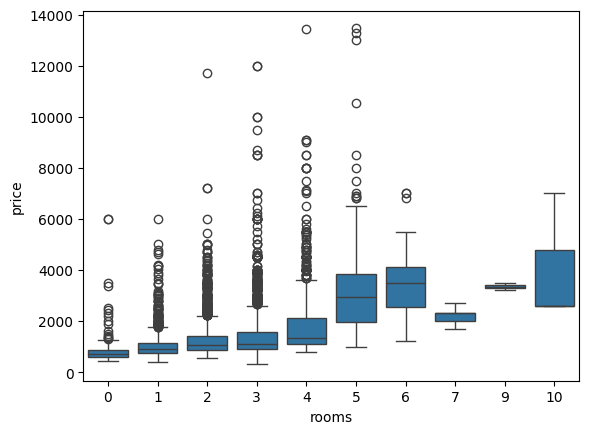

In [9]:
# Preu segons el nombre d'habitacions
sns.boxplot(x='rooms', y='price', data=data)

<Axes: xlabel='bathroom', ylabel='price'>

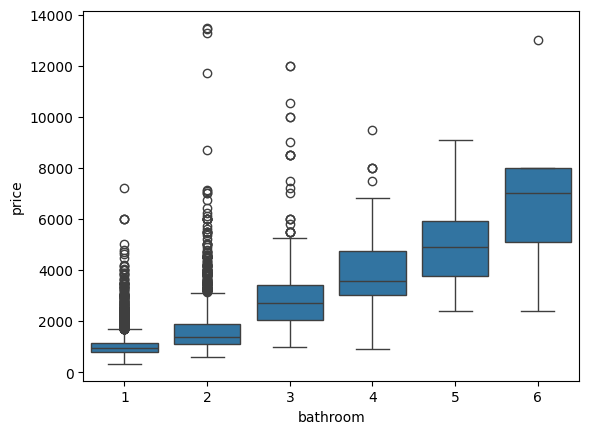

In [ ]:
# Preu segons el nombre de banys
sns.boxplot(x='bathroom', y='price', data=data)